In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [43]:
def fitting(x,m,c):
    return m*x+c

def differentiate(zips):
    XYpairs = list(zips)
    results = []
    for i in range(len(XYpairs)-1):
        x1,y1 = XYpairs[i]
        x2,y2 = XYpairs[i+1]
        new_x   = (x1+x2)/2
        results.append((new_x,slope(x1,y1,x2,y2)))
    new_Xs,Diffs = zip(*results)
    return np.array(new_Xs),np.array(Diffs)

# for i,(num_RG,values) in enumerate(M4s[start:-1]):
#     scaling_fn = M4s[start+i][1]/(M2s[start+i][1])
#     XYpairs = zip(a1,scaling_fn)
#     diff_a1,diff_scaling_fn = differentiate(XYpairs)
#     f_val.append(diff_scaling_fn[30])

[2.273, 2.272] [0.849011113731676, 0.8467861734205442]
[2.224940311131108]
[2.273, 2.272] [0.8831709450694184, 0.8897565414429587]
[2.224940311131108, 6.585596373538082]
[2.273, 2.272] [0.8900909780940865, 0.846807741680704]
[2.224940311131108, 6.585596373538082, 43.283236413368044]
[2.273, 2.272] [0.849496378186836, 0.9260418110711174]
[2.224940311131108, 6.585596373538082, 43.283236413368044, 76.54543288425583]
[1.38629436 2.07944154 2.77258872 3.4657359 ] [0.79973009 1.8848849  3.76776541 4.33788446]


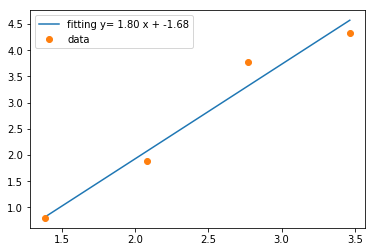

In [48]:
Ls=[4,8,16,32]
diffs=[]
ylist=[]
for L in Ls:
    df = pd.read_csv('for nu2 L=%.d.csv'%L)
    x=[df.iloc[1,1],df.iloc[0,1]]
    y=[df.iloc[1,2]/L,df.iloc[0,2]/L]
    print(x,y)
    diff=abs((y[1]-y[0])/(x[1]-x[0]))
    diffs.append(diff)
    print(diffs)
diffs=np.array(diffs)
diffs=np.log(diffs)
Ls=np.array(Ls)
Ls=np.log(Ls)
print(Ls,diffs)
para,_=curve_fit(fitting,Ls,diffs)
for L in Ls:
    y= fitting(L,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,diffs,'o',label='data')
plt.legend()

[2.273, 2.272] [0.8534362394866818, 0.8554289648785249]
[1.9927253918424765]
[2.273, 2.272] [0.8869750634217198, 0.892486774091039]
[1.9927253918424765, 5.511710669317374]
[2.273, 2.272] [0.8976427650825366, 0.895243879290279]
[1.9927253918424765, 5.511710669317374, 2.3988857922567535]
[2.273, 2.272] [0.867269105913755, 0.8882486242704916]
[1.9927253918424765, 5.511710669317374, 2.3988857922567535, 20.97951835672961]
[1.38629436 2.07944154 2.77258872 3.4657359 ] [0.68950325 1.70687504 0.87500438 3.04354665]
[ 0.89883644 -0.60185847]


Text(0.5,1,'ln (xi/L) vs lnL')

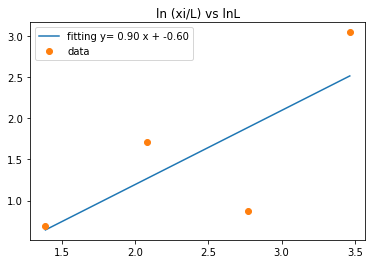

In [65]:
Ls=[4,8,16,32]
diffs=[]
ylist=[]
for L in Ls:
    df = pd.read_csv('for nu L=%.d.csv'%L)
    x=[df.iloc[1,1],df.iloc[0,1]]
    y=[df.iloc[1,2]/L,df.iloc[0,2]/L]
    print(x,y)
    diff=abs((y[1]-y[0])/(x[1]-x[0]))
    diffs.append(diff)
    print(diffs)
diffs=np.array(diffs)
diffs=np.log(diffs)
Ls=np.array(Ls)
Ls=np.log(Ls)
print(Ls,diffs)
para,_=curve_fit(fitting,Ls,diffs)
for L in Ls:
    y= fitting(L,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,diffs,'o',label='data')
plt.legend()
print(para)
plt.title('ln (xi/L) vs lnL')